In [1]:
import pandas as pd
import seaborn as sns

In [ ]:
#Dai beginner_dataset carichiamo in un DataFrame il file automobile.csv:

#Ci sono valori nulli? Dove? Quanti?
#Quali righe hanno un valore nullo nella colonna num-of-doors?
#Esaminando i dati nel dataset, cerchiamo una logica per sostituire i valori nulli nella colonna num-of-doors

In [2]:
auto = pd.read_csv("C:/Users/Marco/Desktop/Epicode/Python/datasets/datasets/beginner_datasets/automobile.csv")
auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [3]:
auto.isna().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [4]:
filtro_nulli = auto.loc[:, "num-of-doors"].isna()
auto.loc[filtro_nulli]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
26,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
60,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [5]:
filtro = (auto["body-style"]=="sedan") & (auto["drive-wheels"]=="fwd") & (auto["engine-location"]=="front")
auto.loc[filtro].groupby(["fuel-type", "aspiration"])["num-of-doors"].value_counts()

fuel-type  aspiration  num-of-doors
diesel     std         four             2
                       two              2
           turbo       four             3
gas        std         four            37
                       two              6
           turbo       four             3
Name: count, dtype: int64

In [6]:
auto.loc[:, "num-of-doors"] = auto["num-of-doors"].fillna("four")

In [7]:
auto[filtro_nulli]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
26,1,148.0,dodge,gas,turbo,four,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
60,0,NaN,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [ ]:
#esercizio_2
#Nel pacchetto os della standard library c'è la funzione os.listdir() che permette di avere la lista dei nomi di file all'interno di una directory; senza input di default li cerca nella directory di lavoro corrente, altrimenti si può passare un path per esaminare una directory specifica, ad esempio os.listdir("mio_progetto/beginner_datasets/")

#Nella directory dei beginner_datasets, quali sono i dataset che contengono dati nulli?
#Dovremo usare un ciclo for per esaminare tutti i nomi dei file
#Dovremo selezionare solo i nomi di file con estensione .csv (quindi usare un costrutto if)
#Nel corpo dovremo leggere di volta in volta il file in esame, e caricarlo in un DataFrame con la funzione .read_csv()
#Sul DataFrame dovremo utilizzare il metodo .isna() per trovare la maschera booleana dei dati nulli
#Dovremo contare i dati nulli, utilizzando .sum(); potremmo doverlo utilizzare più di una volta
#Dovremo stampare, o memorizzare in una list, solo i nomi dei file che contengono dati nulli

In [8]:
import os
path_dir = "datasets/beginner_datasets/"
lista_files = os.listdir(path_dir)
lista_files.sort()
for nome_file in lista_files:
    if ".csv" in nome_file:
        df = pd.read_csv(path_dir + nome_file)
        numero_nulli = df.isna().sum().sum()
        if numero_nulli > 0:
            print(nome_file)
            print("Valori nulli:", numero_nulli, "\n")

automobile.csv
Valori nulli: 39 

elections.csv
Valori nulli: 52 

france.csv
Valori nulli: 66 

hepatitis.csv
Valori nulli: 153 

house.csv
Valori nulli: 7829 

income.csv
Valori nulli: 4262 

mice.csv
Valori nulli: 1396 

nba.csv
Valori nulli: 11 

pokemon.csv
Valori nulli: 386 

population.csv
Valori nulli: 12 

seeds.csv
Valori nulli: 4 

traffic.csv
Valori nulli: 48143 

wikipedia.csv
Valori nulli: 68 



In [ ]:
#esercizio_3
#Sul database titanic, effettuiamo le seguenti analisi:

#Riusciamo a calcolare quanti ponti c'erano sulla nave (prima lettera dei dati nella colonna Cabin)?
#Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco (colonna PClass)
#Fare la stessa cosa per la colonna Survived
#Qual era la distribuzione delle tariffe (Fare)?
#Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco con un boxplot?
#Visualizziamo un boxplot rispetto alle colonne Fare e Survived; che cose ne deduciamo?

In [9]:
dotenv.load_dotenv(override=True, dotenv_path="C:/Users/Marco/Desktop/Epicode/Python/.env")

username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")

connection_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname

db_engine = sqlalchemy.create_engine(connection_string)

query = "SELECT * FROM titanic"
DF=pd.read_sql(query, db_engine)

In [10]:
titanic = pd.read_sql("SELECT * FROM titanic", db_engine)
titanic

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


In [11]:
# trasformiamo i valori nulli da impliciti in espliciti
titanic = titanic.replace("", None)

In [12]:
prima_lettera_cabine = []
for riga_cabina in titanic.Cabin.dropna():
    for cabina in riga_cabina.split():
        prima_lettera_cabine.append( cabina[0] )
set(prima_lettera_cabine)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

<Axes: xlabel='PClass', ylabel='count'>

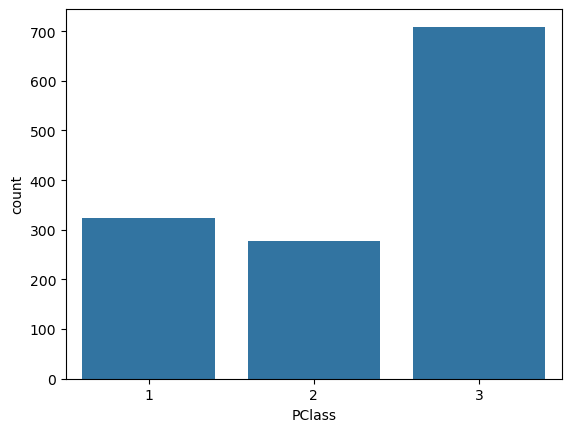

In [13]:
sns.countplot(data=titanic, x="PClass")

<Axes: xlabel='Survived', ylabel='count'>

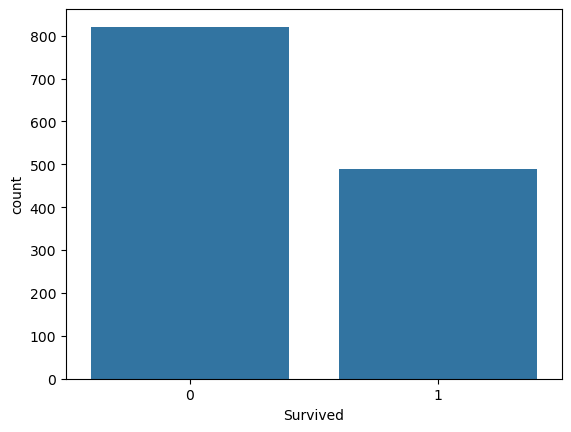

In [14]:
sns.countplot(data=titanic, x="Survived")

<Axes: ylabel='Frequency'>

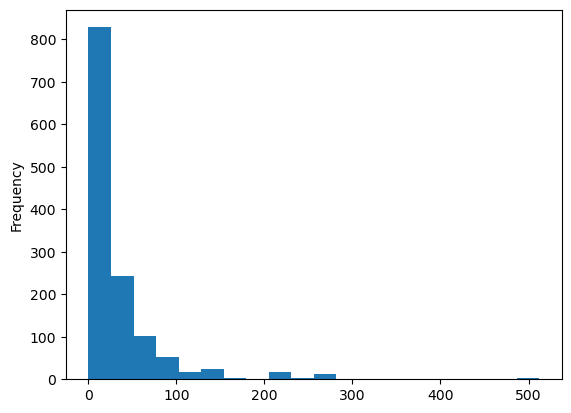

In [15]:
titanic.Fare.plot(kind="hist", bins=20)

<Axes: xlabel='PClass', ylabel='Age'>

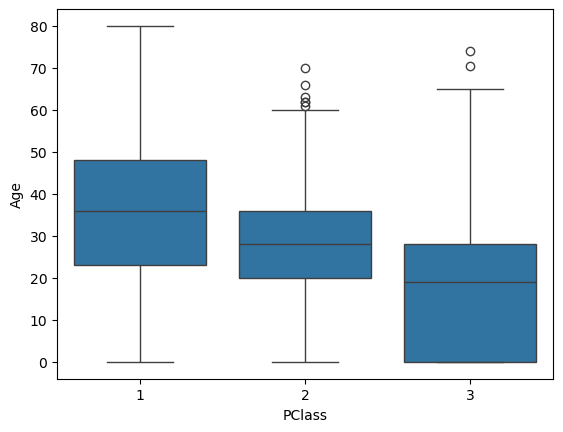

In [16]:
sns.boxplot(data=titanic, x="PClass", y="Age")

<Axes: xlabel='Survived', ylabel='Fare'>

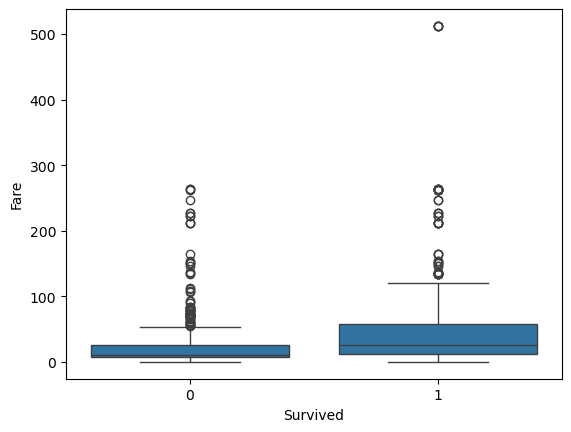

In [17]:
sns.boxplot(data=titanic, x="Survived", y="Fare")

In [ ]:
#Scarichiamo il dataset stockdata.csv da https://github.com/plotly/datasets/blob/master/stockdata.csv e:

#Visualizziamo l'andamento delle azioni della Apple ("AAPL")
#Visualizziamo l'andamento di tutte le azioni del dataset
#Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013
#Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso

In [18]:
stock = pd.read_csv("C:/Users/Marco/Desktop/Epicode/Python/datasets/datasets/beginner_datasets/stockdata.csv")
stock = stock.set_index("Date")
stock

,MSFT,IBM,SBUX,AAPL,GSPC
Date,,,,,
2007-01-03,23.950705,80.517962,16.149666,11.086612,1416.599976
2007-01-04,23.910599,81.378851,16.167992,11.332687,1418.339966
2007-01-05,23.774242,80.642129,16.099269,11.251984,1409.709961
2007-01-08,24.006852,81.867244,16.039710,11.307550,1412.839966
2007-01-09,24.030914,82.835742,15.970989,12.246870,1412.109985
...,...,...,...,...,...
2016-02-24,51.360001,132.800003,58.110001,96.099998,1929.800049
2016-02-25,52.099998,134.500000,58.750000,96.760002,1951.699951
2016-02-26,51.299999,132.029999,58.340000,96.910004,1948.050049


<Axes: xlabel='Date'>

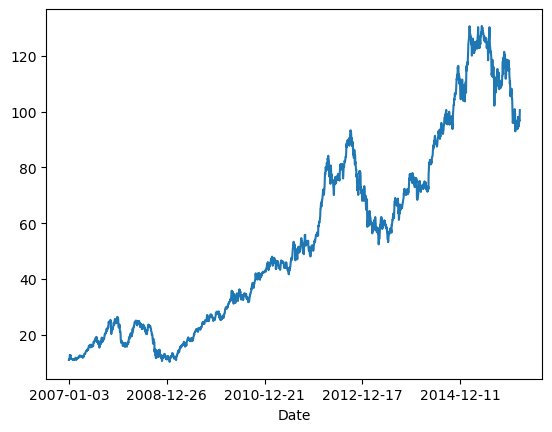

In [19]:
stock.AAPL.plot()

<Axes: xlabel='Date'>

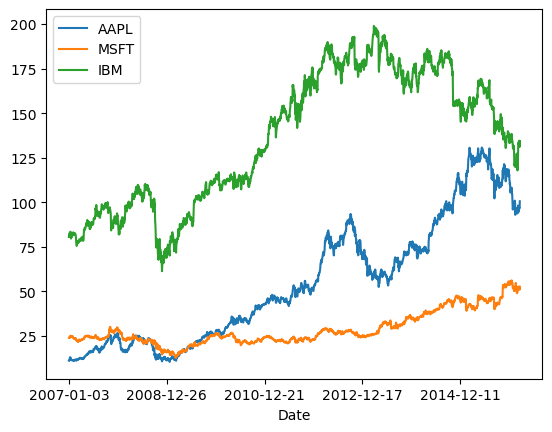

In [20]:
stock.loc[:, ["AAPL", "MSFT", "IBM"]].plot()

<Axes: xlabel='Date'>

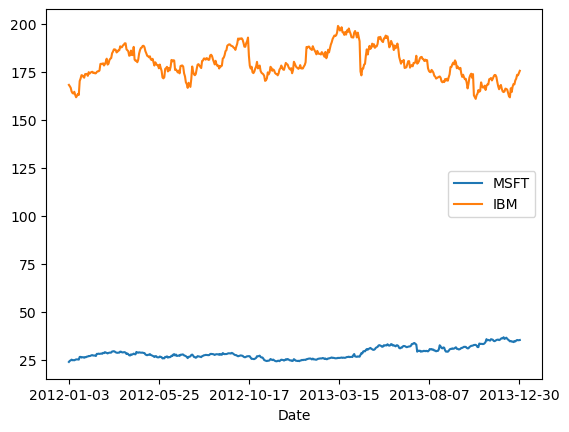

In [21]:
stock.loc["2012-01-01":"2013-12-31", "MSFT":"IBM"].plot()

<Axes: xlabel='Date'>

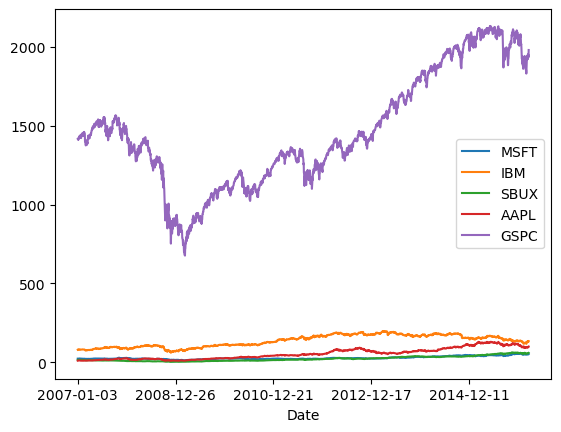

In [22]:
stock.plot()

<Axes: ylabel='Frequency'>

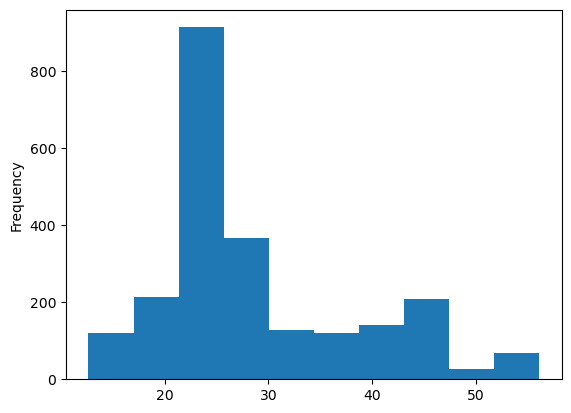

In [23]:
stock.MSFT.plot(kind="hist")

In [ ]:
#esercizio_4
#Scarichiamo il dataset metal_bands_2017.csv dalla piattaforma e:

#Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; cosa si vede? Cose ne deduciamo?
#Delle band che suonano sia Progressive che Thrash, realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine (nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare .loc[:, "style"] e non .style perché quest'ultimo è un metodo)
#Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); si nota qualche trend?

In [24]:
metal = pd.read_csv("C:/Users/Marco/Desktop/Epicode/Python/datasets/datasets/altri_dataset/metal_bands_2017.csv", encoding="latin1", index_col=0)
metal

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [25]:
metal.dtypes

band_name    object
fans          int64
formed       object
origin       object
split        object
style        object
dtype: object

<Axes: ylabel='Frequency'>

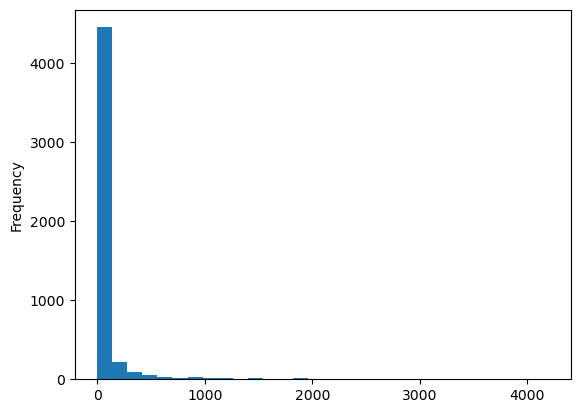

In [26]:
metal.fans.plot(kind="hist", bins=30)

In [27]:
metal

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [28]:
filtro_prog = metal["style"].str.contains("progressive", case=False)
filtro_thra = metal["style"].str.contains("thrash", case=False)
filtro = filtro_prog & filtro_thra
metal_pt = metal.loc[filtro]

In [29]:
fan_by_origin = metal_pt.groupby("origin")["fans"].sum()

<Axes: ylabel='origin'>

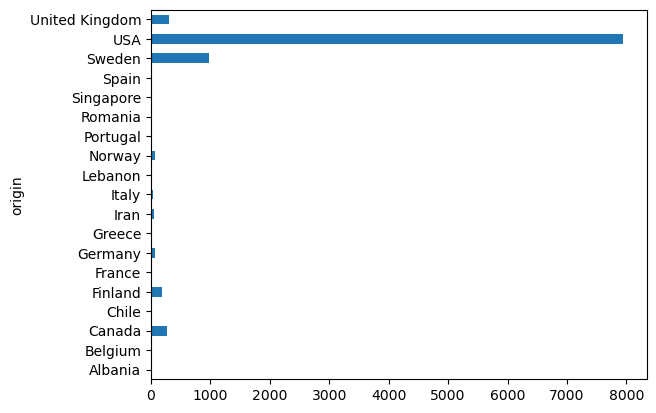

In [30]:
fan_by_origin.plot(kind="barh")

In [31]:
metal.formed.value_counts(dropna=False)

formed
2005    270
2007    265
2006    248
2008    227
2004    221
2003    217
2009    205
1998    203
2010    202
2001    189
1999    182
2002    179
2000    174
1995    169
1996    160
1997    159
1993    157
2011    153
2012    136
1994    132
2013    118
1989    102
1992    100
1990     98
2014     88
1991     77
1988     64
1985     60
1984     53
1986     53
1987     53
1983     42
1982     40
2015     36
1981     30
1979     26
1980     25
1976     17
1978     11
1977     11
1975      7
1968      7
1969      6
1972      5
2016      5
1973      4
-         4
1967      3
1974      3
1964      1
1965      1
1971      1
1970      1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

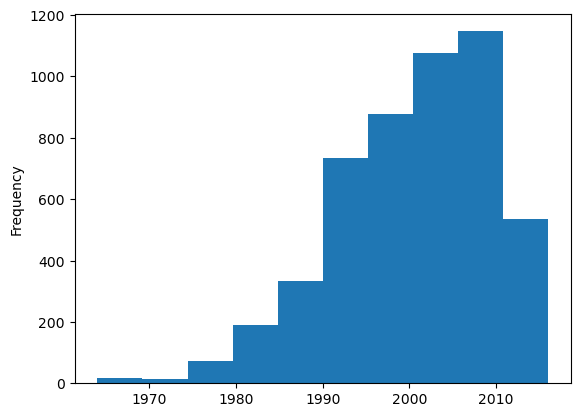

In [32]:
filtro = metal.formed != "-"
metal_fc = metal.loc[filtro]
metal_fc.loc[:, "formed"] = metal_fc.formed.astype(int)
metal_fc.formed.plot(kind="hist")

In [ ]:
#Esercizio_5
#Scarichiamo il dataset elections.csv da https://github.com/plotly/datasets/blob/master/election.csv:

#Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti)
#Con un grafico a barre confrontiamo il numero di votanti per i primi dieci distretti

In [33]:
elections = pd.read_csv("C:/Users/Marco/Desktop/Epicode/Python/datasets/datasets/altri_dataset/election.csv", index_col=0)
elections.head()

,Coderre,Bergeron,Joly,total,winner,result,district_id
district,,,,,,,
101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


In [34]:
elections.loc[:, ["Coderre", "Bergeron", "Joly"]].sum()

Coderre     149467
Bergeron    118637
Joly        123062
dtype: int64

<Axes: >

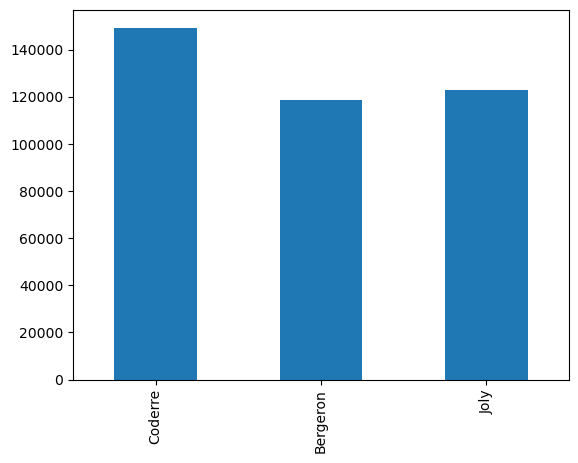

In [35]:
elections.loc[:, ["Coderre", "Bergeron", "Joly"]].sum().plot(kind="bar")

<Axes: ylabel='district'>

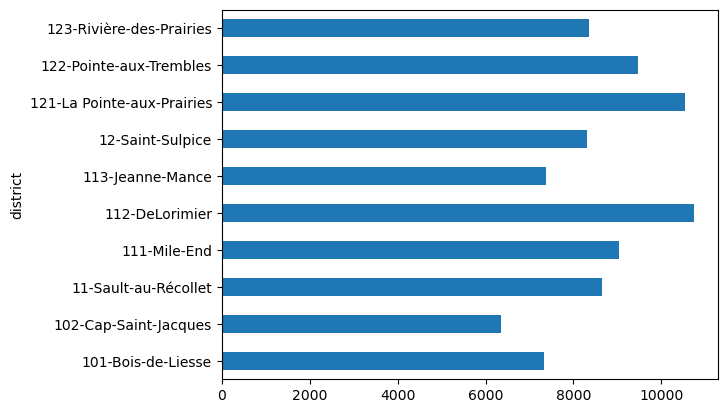

In [36]:
elections.head(10).total.plot(kind="barh")

In [ ]:
#Esercizio_6
#Scarichiamo il file party_in_nyc.csv dal dataset https://www.kaggle.com/datasets/somesnm/partynyc relativo a quante volte è stata chiamata la polizia per delle feste eccessivamente rumorose e:

#Realizziamo un grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale
#Qual è il rettangolo di latitudine e longitudine considerato dal dataset?
#Quante segnalazioni sono state fatte per case private?
#Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere; che succede se aggiungiamo il parametro hue="Location Type"?


In [37]:
party = pd.read_csv("C:/Users/Marco/Desktop/Epicode/Python/datasets/datasets/altri_dataset/party_in_nyc.csv")
party

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279


In [38]:
party.groupby("City").size()

City
ARVERNE                  510
ASTORIA                 3456
BAYSIDE                  232
BELLEROSE                160
BREEZY POINT               1
BRONX                  47673
BROOKLYN               68909
CAMBRIA HEIGHTS          171
CENTRAL PARK              48
COLLEGE POINT            529
CORONA                  2395
EAST ELMHURST           1258
ELMHURST                1260
FAR ROCKAWAY            1535
FLORAL PARK               13
FLUSHING                1761
FOREST HILLS             532
FRESH MEADOWS            613
GLEN OAKS                123
HOLLIS                   670
HOWARD BEACH             438
JACKSON HEIGHTS         1229
JAMAICA                 4041
KEW GARDENS              364
LITTLE NECK              131
LONG ISLAND CITY        1072
MASPETH                  409
MIDDLE VILLAGE           217
NEW HYDE PARK             11
NEW YORK               64112
OAKLAND GARDENS          113
OZONE PARK              1494
QUEENS                    24
QUEENS VILLAGE           954
REGO PARK

In [39]:
print(party.Latitude.min(), party.Latitude.max(), party.Longitude.min(), party.Longitude.max())

40.498819681472185 40.91217840308113 -74.25127710072611 -73.70230256557906


In [40]:
party.loc[:, "Location Type"].unique()

array(['Store/Commercial', 'Residential Building/House',
       'Club/Bar/Restaurant', 'Street/Sidewalk', 'Park/Playground',
       'House of Worship'], dtype=object)

In [41]:
filtro = party.loc[:, "Location Type"] == "Residential Building/House"
party.loc[filtro].shape[0]

146040

<Axes: xlabel='count', ylabel='Borough'>

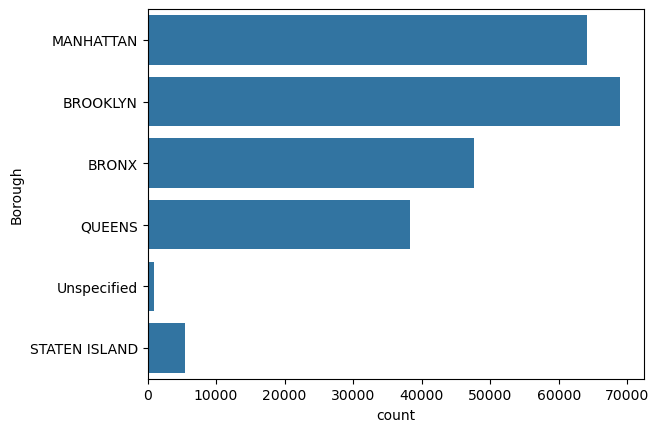

In [44]:
sns.countplot(data=party, y="Borough")

<Axes: xlabel='count', ylabel='Borough'>

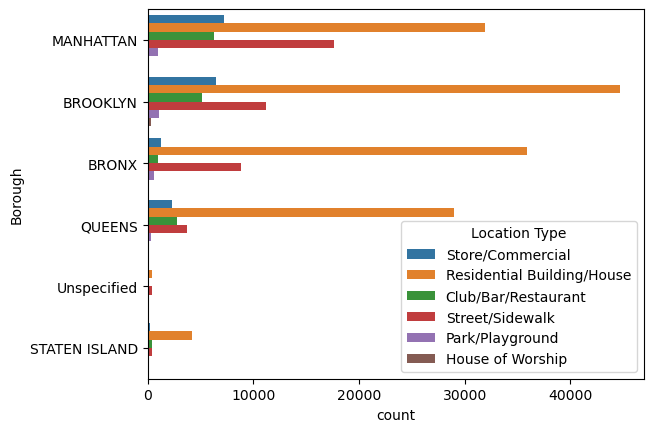

In [45]:
sns.countplot(data=party, y="Borough", hue="Location Type")